In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
sum_data = pd.read_csv('county_model_performance.csv')

In [56]:
sum_data.shape

(18, 4)

In [57]:
sum_data

,countyFIPS,countyName,nObservations,absError
0,48001,Anderson,2079,0.057498
1,48063,Camp,540,0.039266
2,48067,Cass,1791,0.038447
3,48073,Cherokee,2342,0.051451
4,48119,Delta,215,0.070554
5,48159,Franklin,1087,0.035073
6,48203,Harrison,4389,0.079365
7,48213,Henderson,7409,0.492501
8,48223,Hopkins,2584,0.036909
9,48277,Lamar,3183,0.037921


In [58]:
print('Total No of data points used in the model is: ', sum(sum_data.nObservations))

Total No of data points used in the model is:  36377


In [59]:
henderson = sum_data.countyName == 'Henderson'
print(sum_data[henderson].nObservations)

7    7409
Name: nObservations, dtype: int64


In [60]:
print('Percent of data used for the model is: ', (7409/len(data[data.county == 'Henderson'])) *100 )
# Only ~14% of data in Henderson county was used for the model. 
      

Percent of data used for the model is:  13.74072700296736


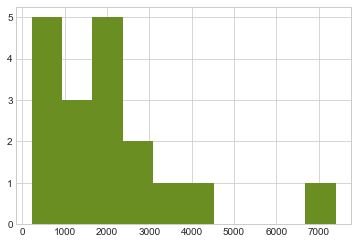

In [61]:
sum_data.nObservations.hist( color = 'olivedrab', )

● countyFIPS​: the unique FIPS identifier for the county <br/>
● countyName​: the name of the county <br/>
● nObservations​: the number of properties used for training the model to estimate ​estimatedValue​ in this county <br/>
● absError​: an absolute percentage error describing our estimate of the performance of the model in this
county. Higher is worse.<br/>

In [62]:
sum_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
countyFIPS       18 non-null int64
countyName       18 non-null object
nObservations    18 non-null int64
absError         18 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 656.0+ bytes


In [63]:
sum_data.describe()

,countyFIPS,nObservations,absError
count,18.000000,18.000000,18.000000
mean,48255.666667,2020.944444,0.084584
std,153.754579,1729.531200,0.118721
min,48001.000000,215.000000,0.021319
25%,48129.000000,813.750000,0.036222
50%,48250.000000,1863.500000,0.038856
75%,48375.500000,2523.500000,0.067290
max,48499.000000,7409.000000,0.492501


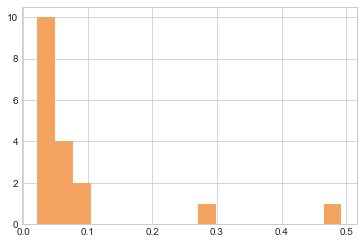

In [64]:
sum_data.absError.hist(bins = 17, color = 'sandybrown')

### Looking into Housing Data

In [77]:
data = pd.read_csv('home_values_texas.csv')

In [78]:
data.head()

,id,address,city,county,countyFIPS,state,zipcode,latitude,longitude,bedrooms,...,yearBuilt,taxYear,taxAssessedValue,taxMarketValue,taxImprovementValue,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimatedValue
0,236813509,111 HILLTOP DR,NAPLES,Morris,48343,TX,75568.0,33.197100,-94.681362,0,...,1962.0,2018,65960.0,65960.0,63810.0,1911-11-11,NaN,NaN,NaN,89724
1,166249408,707 KAY DR,LONGVIEW,Harrison,48203,TX,75601.0,32.506533,-94.684592,0,...,1960.0,2018,140640.0,140640.0,121250.0,1993-01-01,NaN,NaN,NaN,170819
2,215428762,9803 FM 251 S,BIVINS,Cass,48067,TX,75555.0,32.965092,-94.103827,0,...,1999.0,2018,65800.0,65800.0,58270.0,1990-11-14,NaN,NaN,NaN,87347
3,215055126,408 E HINES ST,TALCO,Titus,48449,TX,75487.0,33.362020,-95.099580,0,...,1946.0,2018,27942.0,27942.0,25259.0,NaN,NaN,NaN,NaN,39864
4,235563264,440 W ALABAMA ST,AVERY,Red River,48387,TX,75554.0,33.549630,-94.783930,0,...,1926.0,2018,54369.0,54369.0,52473.0,2008-11-07,NaN,NaN,NaN,64577


In [67]:
data.shape

(234216, 24)

In [68]:
data.state.value_counts()  # ALL data is texas

TX    234216
Name: state, dtype: int64

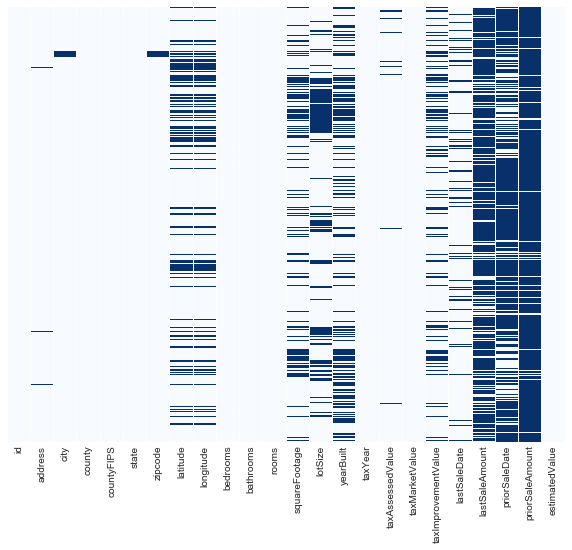

In [69]:
plt.figure(figsize = (10, 8))
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

In [70]:
henderson = data.county == 'Henderson'

In [71]:
data[henderson].head()

,id,address,city,county,countyFIPS,state,zipcode,latitude,longitude,bedrooms,...,yearBuilt,taxYear,taxAssessedValue,taxMarketValue,taxImprovementValue,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimatedValue
65,167662497,13525 TWIN CREEK LN,MABANK,Henderson,48213,TX,75147.0,32.343720,-96.077490,0,...,1988.0,2018,167750.0,167750.0,160770.0,1989-09-01,NaN,NaN,NaN,213168
137,231326505,216 W ANDREW DR,MABANK,Henderson,48213,TX,75147.0,32.356420,-96.108130,0,...,NaN,2018,69190.0,69190.0,62190.0,2018-02-19,NaN,2003-05-13,NaN,119860
190,167667160,310 W MCAFEE DR,MABANK,Henderson,48213,TX,75147.0,32.355610,-96.110180,0,...,NaN,2018,144700.0,144700.0,137700.0,2015-09-11,NaN,2015-06-11,NaN,187000
208,164989679,213 W ALENE DR,MABANK,Henderson,48213,TX,75147.0,32.356760,-96.107770,0,...,1975.0,2018,64080.0,64080.0,57080.0,2014-01-17,NaN,2009-12-10,NaN,115289
356,231332421,15382 COUNTY ROAD 4014,MABANK,Henderson,48213,TX,75147.0,32.446715,-96.079705,0,...,NaN,2018,2000.0,2000.0,NaN,2004-11-09,NaN,NaN,NaN,65000


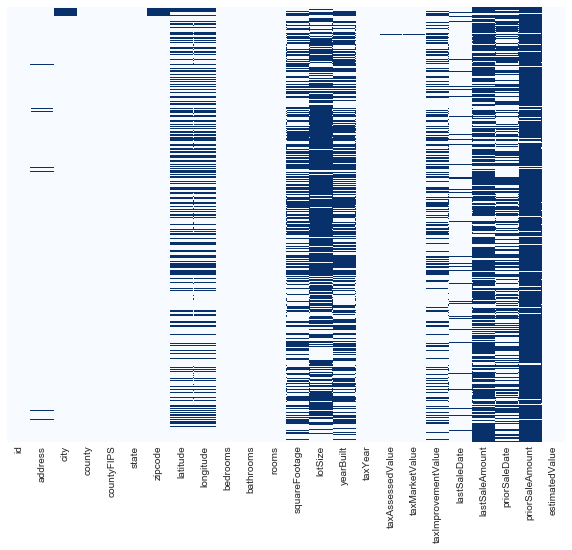

In [72]:
# Lets see what is happening with the missing values with our Henderson county

plt.figure(figsize = (10, 8))
sns.heatmap(data[henderson].isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

In [18]:
data[henderson].county.value_counts()
# looks like in our training set we only have less records -- did the end up in the training set? I guess so
#let's check the math

Henderson    53920
Name: county, dtype: int64

In [19]:
len(data[henderson])

53920

In [20]:
missing_henderson = 7409 - len(data[henderson])
print('Total discrepancy on No of observations for Henderson County is: ', missing_henderson)

Total discrepancy on No of observations for Henderson County is:  -46511


In [89]:
a = round(((7409/53920) *100 ), 2)
print('Percent of observations used for training the model is: {}%'.format( a))

Percent of observations used for training the model is: 13.74%


In [25]:
data.columns

Index(['id', 'address', 'city', 'county', 'countyFIPS', 'state', 'zipcode',
       'latitude', 'longitude', 'bedrooms', 'bathrooms', 'rooms',
       'squareFootage', 'lotSize', 'yearBuilt', 'taxYear', 'taxAssessedValue',
       'taxMarketValue', 'taxImprovementValue', 'lastSaleDate',
       'lastSaleAmount', 'priorSaleDate', 'priorSaleAmount', 'estimatedValue'],
      dtype='object')

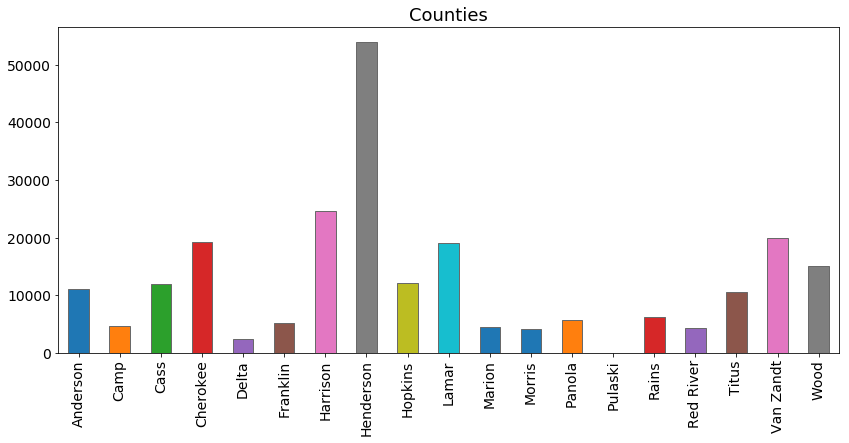

In [26]:
plt.title('Counties', fontsize = 18)

plt.grid(c = 'lemonchiffon', linestyle = '--')
ax = data['county'].value_counts().sort_index().plot.bar(
    figsize = (14,6),
    fontsize = 14, edgecolor='dimgrey')

### Ok, so Henderson is the most represented county in our dataset. Let's see how all the features correlate 

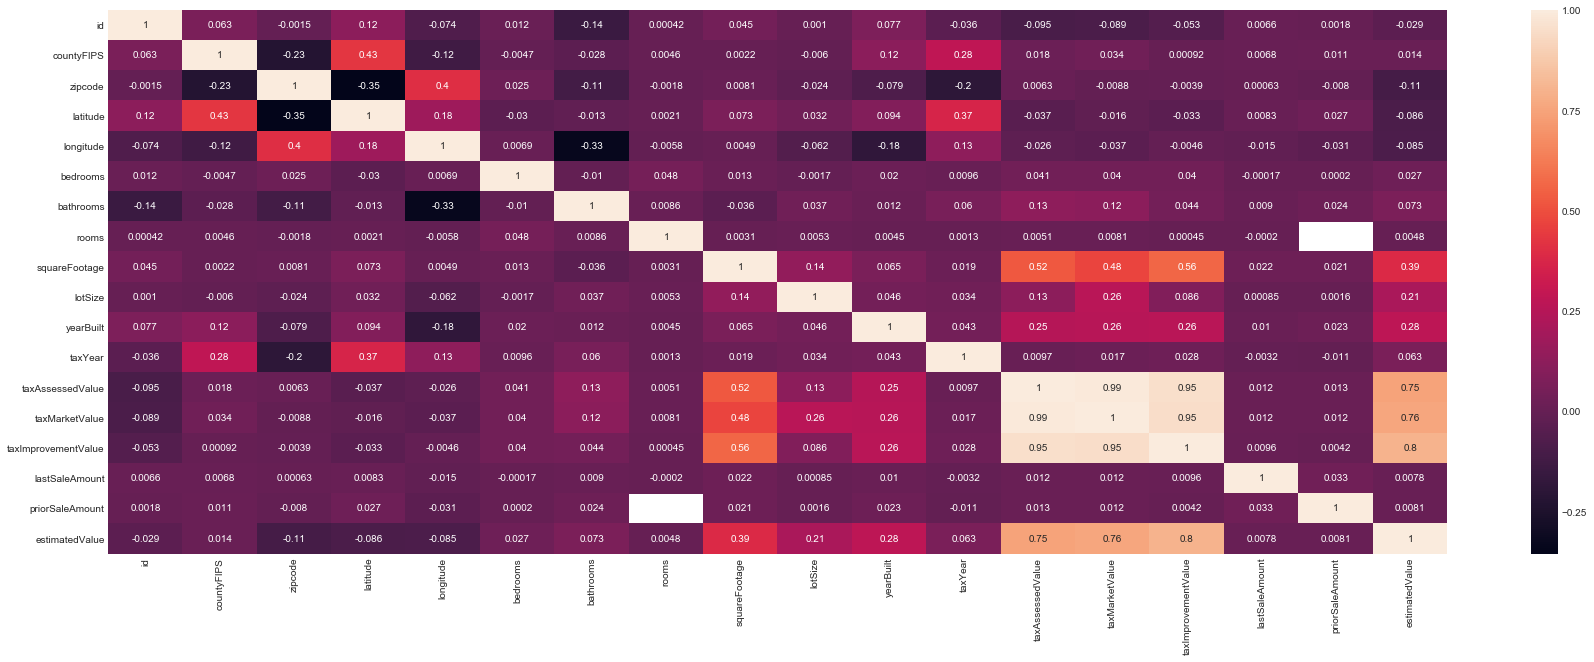

In [90]:
plt.figure(figsize = (30, 10))
sns.heatmap(data.corr(), annot = True)

We see that our strongest predictors are 'taxAssessedValue','taxMarketValue', 'taxImprovementValue'. All have high (>0.75) positive corr with the target. However (see below) we also have a multicolinearity between these independent vars. 

For report: Do VIF 1/(1 - R**2)

In [28]:
data.columns

Index(['id', 'address', 'city', 'county', 'countyFIPS', 'state', 'zipcode',
       'latitude', 'longitude', 'bedrooms', 'bathrooms', 'rooms',
       'squareFootage', 'lotSize', 'yearBuilt', 'taxYear', 'taxAssessedValue',
       'taxMarketValue', 'taxImprovementValue', 'lastSaleDate',
       'lastSaleAmount', 'priorSaleDate', 'priorSaleAmount', 'estimatedValue'],
      dtype='object')

From this correlation matrix we can see the best predictors for our model and the highest correlated features with our target: 
* 'taxAssessedValue',  ---> NO MISSING VALUES
* 'taxMarketValue',  -----> No Missing Values
* 'taxImprovementValue'  ----> many missing values --> 22% Missing Values and this is our highest predictor. To impove the model we need to get more data here. 
* Sq Footage ---> Many missing values

No I want to see how are we doing in terms of missing values for these features for Henderson County

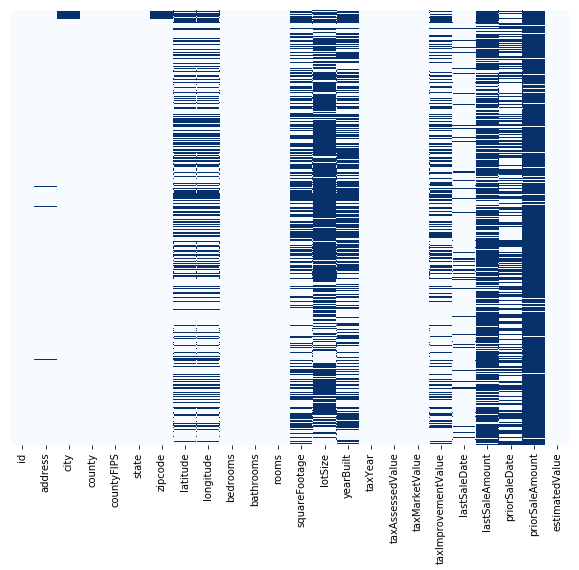

In [29]:
plt.figure(figsize = (10, 8))
sns.heatmap(data[henderson].isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

In [30]:
missing_values = (sum(data['taxImprovementValue'].isnull())/234216)*100
print('Missing Values percentage for taxImprovementValue is: '), missing_values

Missing Values percentage for taxImprovementValue is: 


(None, 21.595877309833657)

(0, 400000)

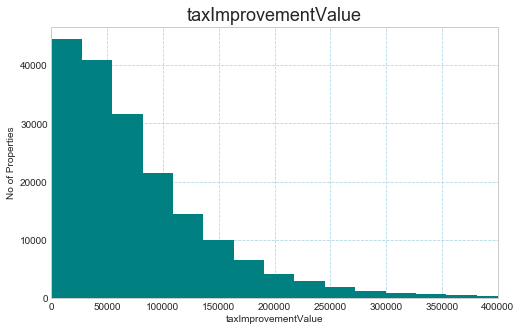

In [73]:
plt.title('taxImprovementValue', fontsize = 18)
plt.style.use('seaborn-whitegrid')
plt.xlabel('taxImprovementValue')
plt.ylabel('No of Properties')
data['taxImprovementValue'].hist(bins = 250, figsize = (8,5), color = 'teal')
plt.grid(c = 'lightblue', linestyle = '--')
plt.xlim((0, 400000))

(0, 700000)

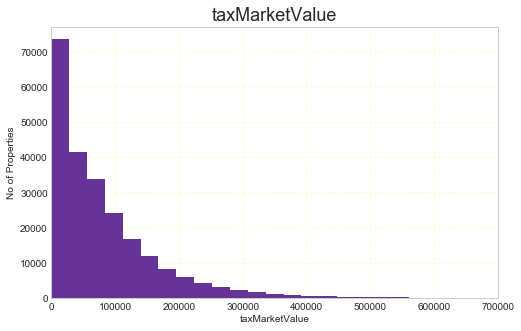

In [76]:
plt.title('taxMarketValue', fontsize = 18)
plt.style.use('seaborn-whitegrid')
plt.xlabel('taxMarketValue')
plt.ylabel('No of Properties')
data['taxMarketValue'].hist(bins = 250, figsize = (8,5), color = 'rebeccapurple')
plt.grid(c = 'lemonchiffon', linestyle = '--')
plt.xlim((0, 700000))

In [33]:
data['taxMarketValue'].max()

7002000.0

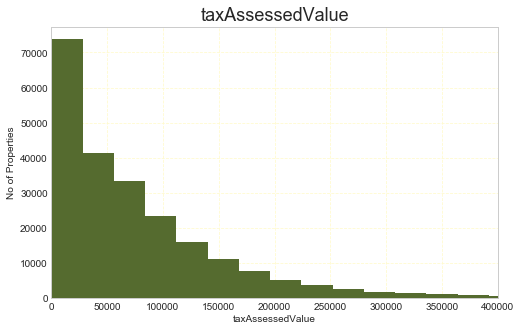

In [75]:
plt.title('taxAssessedValue', fontsize = 18)

plt.xlabel('taxAssessedValue')
plt.ylabel('No of Properties')
data['taxAssessedValue'].hist(bins = 250, figsize = (8,5), color = 'darkolivegreen')

plt.xlim((0, 400000))
plt.grid(c = 'lemonchiffon', linestyle = '--')

### multicollinearity ----> we have two predictors that are correlated between each other which causes some 

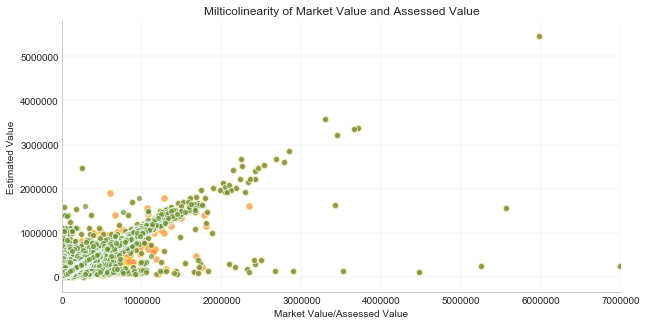

In [91]:
# data.taxMarketValue = data.taxMarketValue.fillna(-1)
# data.taxAssessedValue = data.taxAssessedValue.fillna(-1)


plt.style.use('seaborn-whitegrid')

X = data.taxMarketValue
Y = data.taxAssessedValue


fig, ax = plt.subplots(figsize=(10, 5))


#assigns a color to each data point
ax.scatter(X, data.estimatedValue, alpha=0.70, color='salmon', edgecolors='gold')
ax.scatter(Y, data.estimatedValue, alpha = 0.7, color = 'olivedrab', edgecolors='azure')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(color='grey', linestyle='-', linewidth=0.15, alpha=0.5)
ax.set_title('Milticolinearity of Market Value and Assessed Value')
ax.set_xlabel('Market Value/Assessed Value')
ax.set_ylabel('Estimated Value')
ax.set_xlim(0,7000000)

plt.show()




In [92]:
from scipy.stats import pearsonr
pearson, _ = pearsonr(X, Y)
print('Pearson Correlation coef between Market Value/ Assessed Value is: '), pearson

Pearson Correlation coef between Market Value/ Assessed Value is: 


(None, nan)

Correlated features in general don't improve models (although it depends on the specifics of the problem like the number of variables and the degree of correlation), but they affect specific models in different ways and to varying extents:

* For linear models (e.g., linear regression or logistic regression), multicolinearity can yield solutions that are wildly varying and possibly numerically unstable.

* Random forests can be good at detecting interactions between different features, but highly correlated features can mask these interactions.

* More generally, this can be viewed as a special case of Occam's razor. A simpler model is preferable, and, in some sense, a model with fewer features is simpler. The concept of minimum description length makes this more precise.


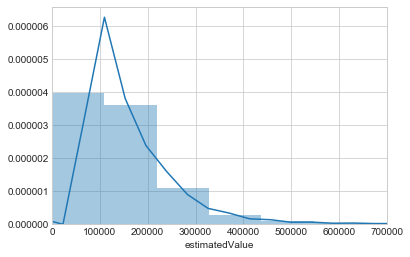

In [93]:
sns.distplot(data.estimatedValue,kde = True)
plt.xlim(0, 700000)
plt.show()

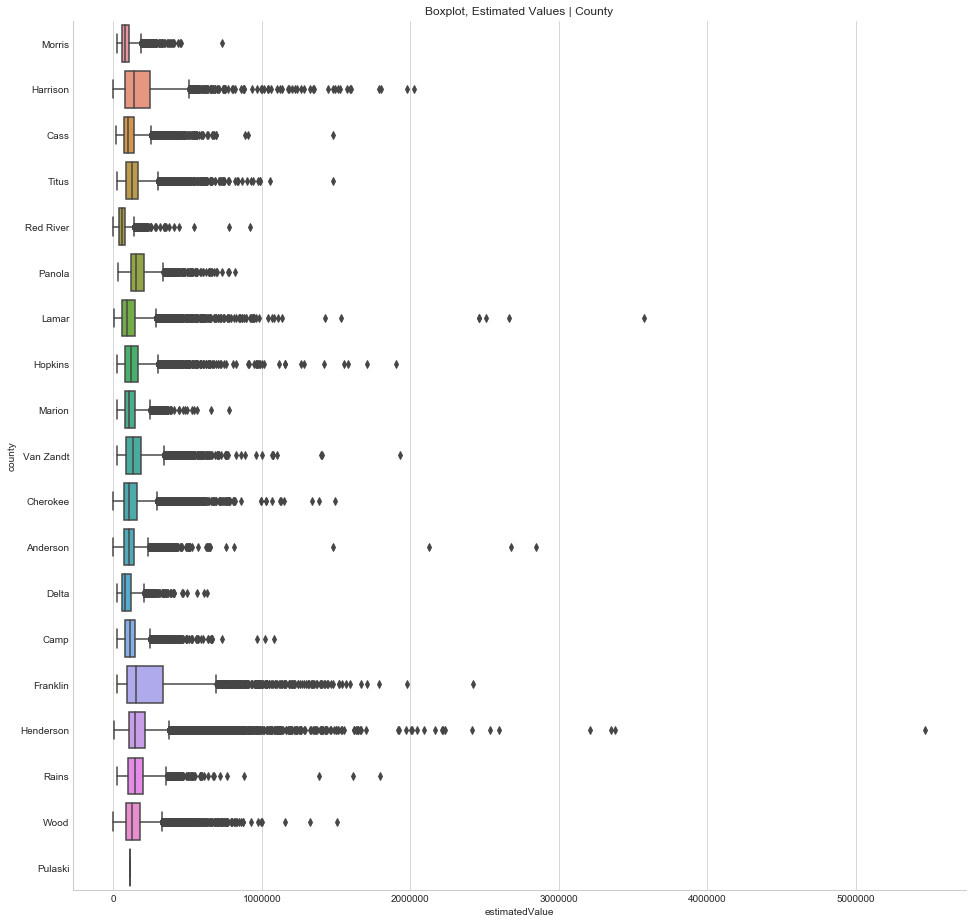

In [94]:
fig, ax = plt.subplots(figsize=[16, 16])
sns.boxplot(
    data=data,
    y=data.county,
    x=data.estimatedValue
)
ax.set_title('Boxplot, Estimated Values | County')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [97]:
mean_y = data.estimatedValue.mean()



(0, 1000000)

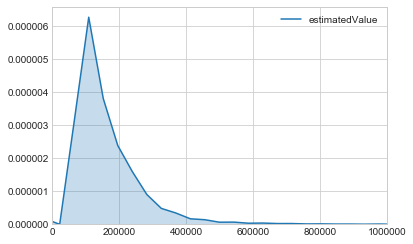

In [98]:
ax = sns.kdeplot(data.estimatedValue,
                  shade=True,shade_lowest=False)
plt.xlim(0, 1000000)

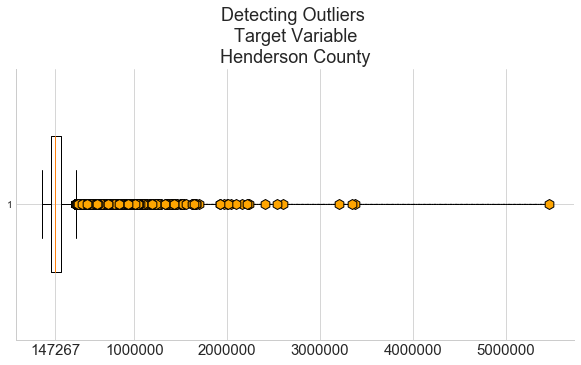

In [101]:
fig, ax1 = plt.subplots(figsize=[10, 5])

ax1.set_title('Boxplot, Estimated Values | County')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)


flierprops = dict(marker='h', markerfacecolor='orange', markersize=10,
                  linestyle='--')
ax1.set_title('Detecting Outliers \n Target Variable \n Henderson County ', fontsize = 18)
ax1.boxplot(hdata.estimatedValue, vert=False, flierprops=flierprops, meanline = True, widths=(1))
# ax1.axvline(x = mean_y, c = 'orangered', label = 'AVG Estimated Price ', linewidth = 3.0)
plt.ylim(0, 2)
# plt.legend(loc='upper center')
plt.xticks(( mean_y, 1000000, 2000000, 3000000, 4000000, 5000000), fontsize = 15, rotation = 0)

plt.show()

### Ideas for improvement: Add more features Luxury/not, neiborhood? 
### For report:  what we should do with outliers. (remove, transform, use different model that is more sensitive with outliers.) 

* outlier or an honest-to-goodness data point your model should account for
* remove outliers/ we can do log transformation of the target as well. 

### Lets look at the Henderson County to see what else we can find

In [102]:
mdata = pd.read_csv('home_values_texas.csv')

In [103]:
mdata.columns

Index(['id', 'address', 'city', 'county', 'countyFIPS', 'state', 'zipcode',
       'latitude', 'longitude', 'bedrooms', 'bathrooms', 'rooms',
       'squareFootage', 'lotSize', 'yearBuilt', 'taxYear', 'taxAssessedValue',
       'taxMarketValue', 'taxImprovementValue', 'lastSaleDate',
       'lastSaleAmount', 'priorSaleDate', 'priorSaleAmount', 'estimatedValue'],
      dtype='object')

In [104]:
#Lets only model for henderson county
hdata = mdata[henderson]

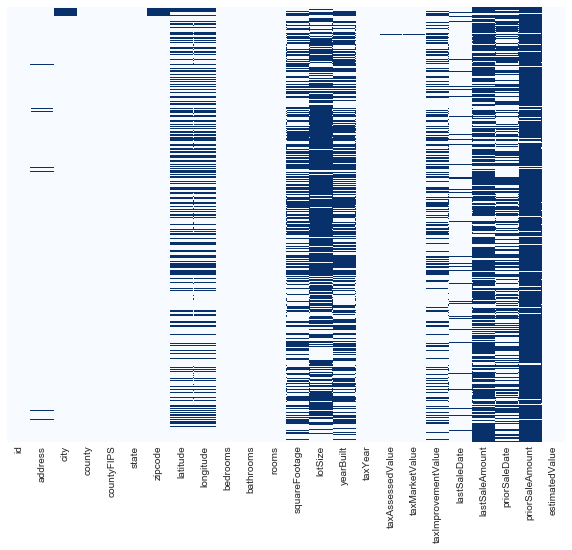

In [105]:
plt.figure(figsize = (10, 8))
sns.heatmap(hdata.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

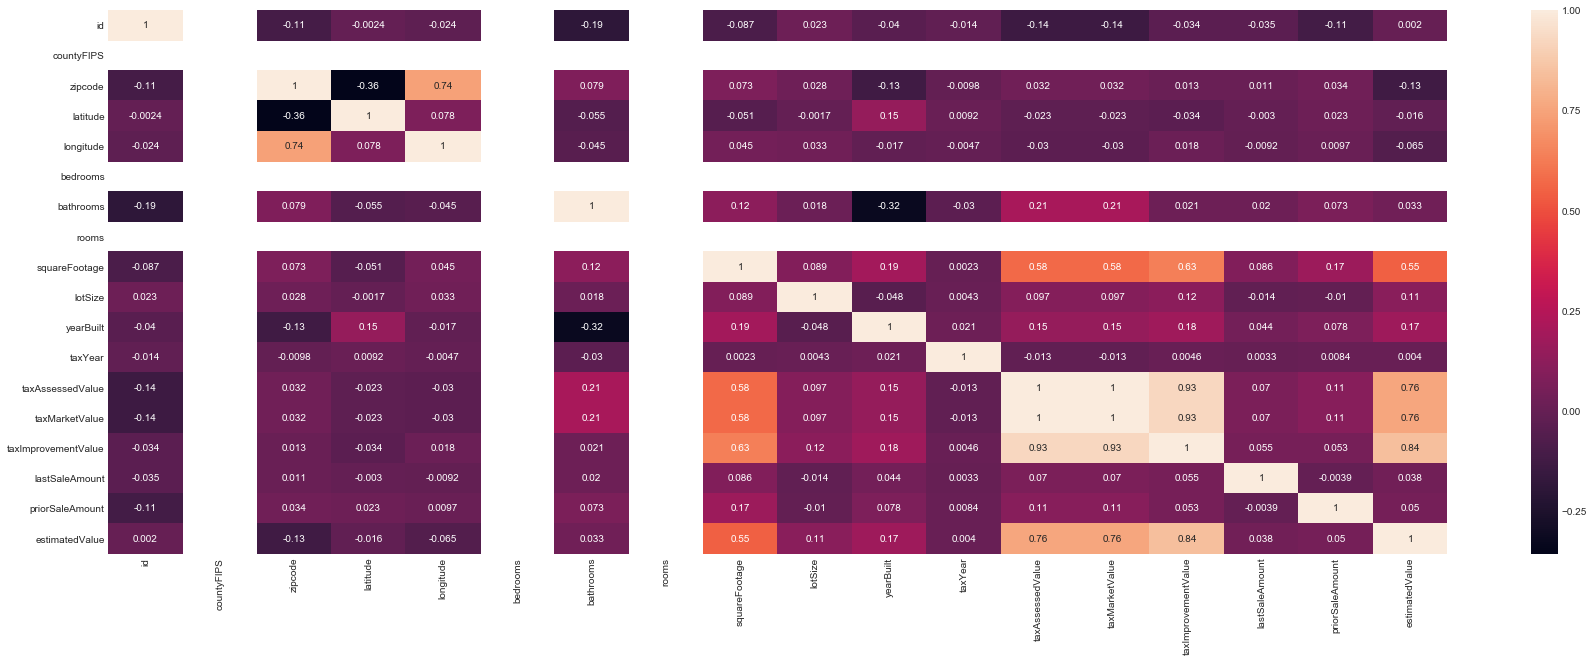

In [106]:
plt.figure(figsize = (30, 10))
sns.heatmap(hdata.corr(), annot = True)

* What is going on with our bedrooms and rooms situation in data? Missing values? 
* We are missing data for 'bedrooms' in henderson county so if it was used for the model it is a bad predictor. 
* Same with rooms.

In [107]:
hdata.bedrooms.value_counts() 


0    53920
Name: bedrooms, dtype: int64

In [108]:
hdata.rooms.value_counts() # we are missing data for 'rooms' in henderson county

0    53920
Name: rooms, dtype: int64

In [112]:
hdata.countyFIPS.value_counts() # ok so it was just one value

48213    53920
Name: countyFIPS, dtype: int64

In [113]:
hdata.describe()

,id,countyFIPS,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,taxYear,taxAssessedValue,taxMarketValue,taxImprovementValue,lastSaleAmount,priorSaleAmount,estimatedValue
count,5.392000e+04,53920.0,52895.000000,33753.000000,33753.000000,53920.0,53920.000000,53920.0,28233.000000,1.460400e+04,23705.000000,53920.000000,5.384200e+04,5.384200e+04,3.460300e+04,12058.000000,2727.000000,5.392000e+04
mean,2.028456e+08,48213.0,75385.662369,32.245382,-95.913811,0.0,1.188807,0.0,1442.006021,3.825728e+05,1980.770892,2017.995215,8.058975e+04,8.058975e+04,9.083104e+04,3804.653840,12384.719839,1.791283e+05
std,5.941757e+07,0.0,295.422225,0.094583,0.286112,0.0,2.179751,0.0,700.636986,1.767649e+06,17.191155,0.102706,1.401941e+05,1.401941e+05,1.128622e+05,25175.840323,39009.188896,1.325494e+05
min,2.535440e+05,48213.0,75103.000000,30.656230,-97.298392,0.0,0.000000,0.0,100.000000,1.310000e+02,1890.000000,2015.000000,5.000000e+01,5.000000e+01,2.000000e+01,0.000000,0.000000,3.000000e+03
25%,1.676680e+08,48213.0,75156.000000,32.196610,-96.117120,0.0,0.000000,0.0,984.000000,2.517800e+04,1971.000000,2018.000000,2.500000e+03,2.500000e+03,2.587000e+04,0.000000,0.000000,1.040000e+05
50%,2.313028e+08,48213.0,75156.000000,32.248103,-96.008230,0.0,0.000000,0.0,1332.000000,6.669000e+04,1982.000000,2018.000000,3.195000e+04,3.195000e+04,5.943000e+04,0.000000,0.000000,1.450000e+05
75%,2.313244e+08,48213.0,75752.000000,32.302631,-95.750474,0.0,1.500000,0.0,1750.000000,2.178000e+05,1995.000000,2018.000000,1.035000e+05,1.035000e+05,1.194300e+05,0.000000,0.000000,2.120000e+05
max,3.259452e+08,48213.0,76567.000000,40.714772,-74.004371,0.0,13.000000,0.0,13796.000000,1.047380e+08,2018.000000,2018.000000,5.983940e+06,5.983940e+06,2.932500e+06,925000.000000,524885.000000,5.466093e+06


In [92]:
hdata.city.value_counts()

MABANK             13028
ATHENS              9022
CHANDLER            5746
GUN BARREL CITY     4549
MALAKOFF            3481
KEMP                2826
TOOL                2664
TRINIDAD            2552
EUSTACE             2365
FRANKSTON           2301
BROWNSBORO          1393
LARUE               1171
MURCHISON            835
ENCHANTED OAKS       391
SEVEN POINTS         356
LOG CABIN            193
POYNOR                 7
PALESTINE              7
COFFEE CITY            2
DALLAS                 2
LUFKIN                 1
ROCKDALE               1
BULLARD                1
RULE                   1
JACKSONVILLE           1
CORSICANA              1
GUN BARREL CY          1
CANTON                 1
Name: city, dtype: int64

Text(0, 0.5, '$ AVG Estimated Cost')

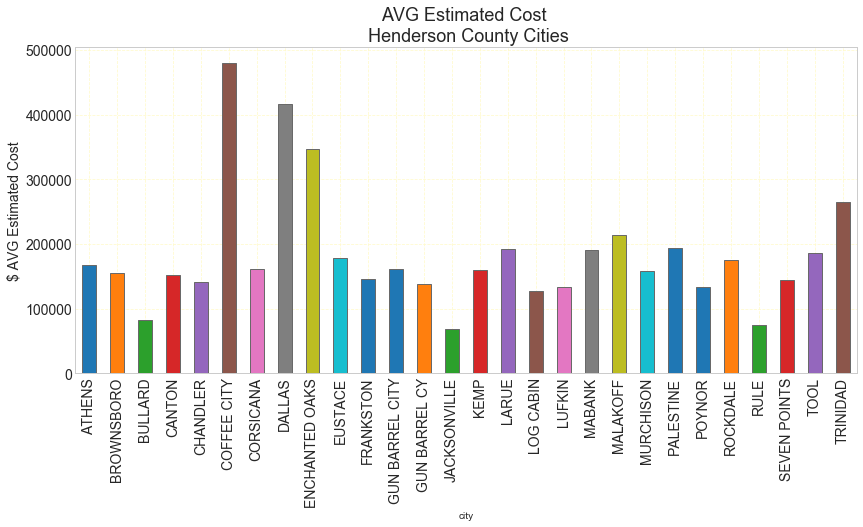

In [114]:
plt.title('AVG Estimated Cost \n Henderson County Cities', fontsize = 18)

plt.grid(c = 'lemonchiffon', linestyle = '--')
ax = hdata.groupby('city').mean()['estimatedValue'].sort_index().plot.bar(
    figsize = (14,6),
    fontsize = 14, edgecolor='dimgrey')

plt.ylabel('$ AVG Estimated Cost', fontsize = 14)

In [94]:
hdata.groupby('city').mean()['estimatedValue']

city
ATHENS             167300.415761
BROWNSBORO         156046.280689
BULLARD             82000.000000
CANTON             152000.000000
CHANDLER           141325.564393
COFFEE CITY        480500.000000
CORSICANA          161234.000000
DALLAS             417088.000000
ENCHANTED OAKS     346525.936061
EUSTACE            178108.745032
FRANKSTON          146142.619296
GUN BARREL CITY    162077.810288
GUN BARREL CY      138285.000000
JACKSONVILLE        68121.000000
KEMP               159544.152159
LARUE              192863.374039
LOG CABIN          127937.082902
LUFKIN             133888.000000
MABANK             190222.709549
MALAKOFF           214825.796897
MURCHISON          158583.914970
PALESTINE          194245.857143
POYNOR             133989.571429
ROCKDALE           175000.000000
RULE                74393.000000
SEVEN POINTS       144306.567416
TOOL               186219.242492
TRINIDAD           264751.093260
Name: estimatedValue, dtype: float64

In [100]:
coffee = hdata.city == 'COFFEE CITY'

In [102]:
hdata[coffee].estimatedValue.value_counts()

390000    1
571000    1
Name: estimatedValue, dtype: int64

In [104]:
dallas = hdata.city == 'DALLAS'

In [108]:
len(hdata[dallas]) 
# only 2 data points for dallas, perhaps luzury cities need to be treated as a separate category here

2

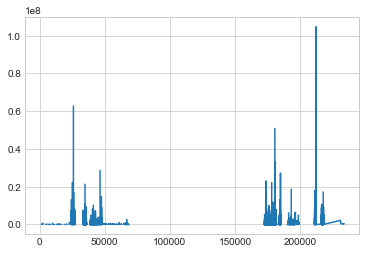

In [163]:
hdata.lotSize.plot()

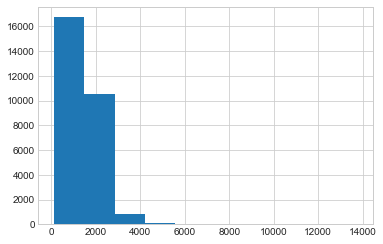

In [164]:
hdata.squareFootage.hist()

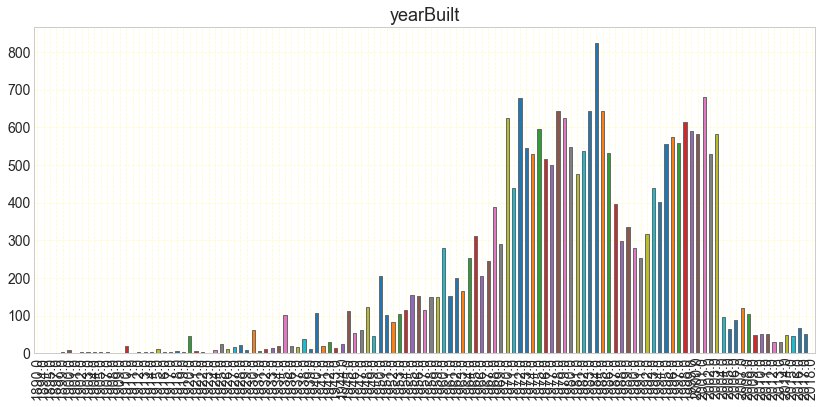

In [172]:
plt.title('yearBuilt', fontsize = 18)

plt.grid(c = 'lemonchiffon', linestyle = '--')
ax = hdata['yearBuilt'].value_counts().sort_index().plot.bar(
    figsize = (14,6),
    fontsize = 14, edgecolor='dimgrey')
# plt.xticks(np.arange(1850, 2020, step=25))
# plt.xticks((1850, 1900, 1920, 1940, 1960, 1970, 1980, 1990, 2000, 2010, 2015), fontsize = 15)

In [ ]:
plt.scatter(hdata.latitude)

### NEXT STOP VIF, but first lets through it into our regression model. 

In [144]:
hd = hdata.copy()

In [134]:
hd.shape

(53920, 24)

In [145]:
hd.columns

Index(['id', 'address', 'city', 'county', 'countyFIPS', 'state', 'zipcode',
       'latitude', 'longitude', 'bedrooms', 'bathrooms', 'rooms',
       'squareFootage', 'lotSize', 'yearBuilt', 'taxYear', 'taxAssessedValue',
       'taxMarketValue', 'taxImprovementValue', 'lastSaleDate',
       'lastSaleAmount', 'priorSaleDate', 'priorSaleAmount', 'estimatedValue'],
      dtype='object')

In [175]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


hd.dropna()
hd = hd._get_numeric_data()
hd = hd[['bathrooms','squareFootage', 'lotSize', 'yearBuilt',
       'taxYear', 'taxAssessedValue', 'taxMarketValue', 'taxImprovementValue', 'estimatedValue']].dropna()

features = hd.drop(['estimatedValue'], 1)

In [176]:
X = hd.drop(['estimatedValue'], 1).values

y = hd['estimatedValue']

In [153]:
X.shape, y.shape

((8119, 8), (8119,))

In [154]:
model = sm.OLS(y, X) 
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         estimatedValue   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                          4.375e+04
Date:                Tue, 07 May 2019   Prob (F-statistic):                        0.00
Time:                        14:05:41   Log-Likelihood:                         -97592.
No. Observations:                8119   AIC:                                  1.952e+05
Df Residuals:                    8112   BIC:                                  1.952e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            69.4190    200.769      0.346      0.730    -324.141     462.979
x2             6.1167      0.738      8.289      0.000       4.670       7.563
x3             0.0030      0.000     11.892      0.000       0.002       0.003
x4           116.3051     24.963      4.659      0.000      67.372     165.238
x5           -83.8297     24.434     -3.431      0.001    -131.726     -35.933
x6             0.4458      0.003    133.665      0.000       0.439       0.452
x7             0.4458      0.003    133.665      0.000       0.439       0.452
x8            -0.0198      0.010     -1.988      0.047      -0.039      -0.000
==============================================================================
Omnibus:                     8544.017   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1468910.656
Skew:                           4.926   Prob(JB):                         0.00
Kurtosis:                      68.154   Cond. No.                     2.22e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.84e-19. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [177]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif["features"] = features.columns


In [178]:
vif.round(1)

,VIF Factor,features
0,1.700000e+00,bathrooms
1,8.800000e+00,squareFootage
2,1.100000e+00,lotSize
3,1.225670e+04,yearBuilt
4,1.221190e+04,taxYear
5,inf,taxAssessedValue
6,inf,taxMarketValue
7,1.370000e+01,taxImprovementValue


If the VIF is equal to 1 there is no multicollinearity among factors, but if the VIF is greater than 1, the predictors may be moderately correlated. The output above shows that the VIF for the Publication and Years factors are about 1.5, which indicates some correlation, but not enough to be overly concerned about. A VIF between 5 and 10 indicates high correlation that may be problematic. And if the VIF goes above 10, you can assume that the regression coefficients are poorly estimated due to multicollinearity.


* We can do some feature eng and combine tax related features. 
Also we need to

Remove highly correlated predictors from the model.  If you have two or more factors with a high VIF, remove one from the model. Because they supply redundant information, removing one of the correlated factors usually doesn't drastically reduce the R-squared.  Consider using stepwise regression, best subsets regression, or specialized knowledge of the data set to remove these variables. Select the model that has the highest R-squared value. 
     
Use Partial Least Squares Regression (PLS) or Principal Components Analysis, regression methods that cut the number of predictors to a smaller set of uncorrelated components.


In [183]:
residuals = results.resid
student_resids = results.outlier_test()['student_resid']

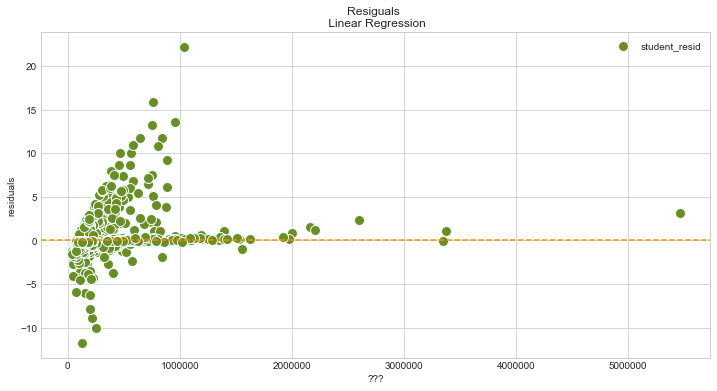

In [194]:
fig, (ax1) = plt.subplots(1, figsize=(12, 6))

# ax1.scatter(credit_model.fittedvalues, student_resid, edgecolor='none', alpha=.3
# plt.scatter(y, residuals, color = 'olivedrab', edgecolors='azure', s=40, label = 'residuals')
plt.scatter(y, student_resids, color = 'olivedrab', edgecolors='azure', s=100)
plt.xlabel('???')
plt.legend()
plt.ylabel('residuals')
plt.title("Resiguals \n Linear Regression") 

ax1.axhline(0, color='darkorange', linestyle='--')

## FOR REPORT/presentation: 

### Problems
* we observe many outliers in Henderson county (box-whiskers plot)
* incorrect data for rooms, bedrooms (all zeros, show corr mat, value counts )
* multicolinearity of predictors (VIF factor, all tax features)
* sparse data in general. Only 14% of the all data made it to training the model

### Recommendations
* treat outliers (remove, log transform, cap your outliers data, assign a new values, try models that are robust to outliers (regression tree model))
* collect data on rooms, bathrooms, bedrooms as they should be a solid predictor
* perform feature eng for the tax related features due to multicolinearity. Maybe we can use the AVG between these 3 features and create one feat. 
* use different model like regression tree that is more sensitive to outliers. 
* only 14 % of data made it to the training. Need to collect more data (to fill n/a) for better predicive power of the model.

### Notes

Each residual contributes proportionally to the total amount of error, meaning that larger errors will contribute linearly to the overall error.